<a href="https://colab.research.google.com/github/Celestia-Analytics/exoplanet-data-visualization/blob/Bina/exoplanet_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+pl_name,hostname,discoverymethod,disc_year,disc_locale,disc_facility,disc_telescope,disc_instrument+from+pscomppars&format=csv"
df = pd.read_csv(url)

In [5]:
#check if there is any nulls in the data
display(df.isnull().sum())

,0
pl_name,0
hostname,0
discoverymethod,0
disc_year,0
disc_locale,0
disc_facility,0
disc_telescope,0
disc_instrument,0


In [6]:
df.head()

,pl_name,hostname,discoverymethod,disc_year,disc_locale,disc_facility,disc_telescope,disc_instrument
0,Kepler-1167 b,Kepler-1167,Transit,2016,Space,Kepler,0.95 m Kepler Telescope,Kepler CCD Array
1,Kepler-1740 b,Kepler-1740,Transit,2021,Space,Kepler,0.95 m Kepler Telescope,Kepler CCD Array
2,Kepler-1581 b,Kepler-1581,Transit,2016,Space,Kepler,0.95 m Kepler Telescope,Kepler CCD Array
3,Kepler-644 b,Kepler-644,Transit,2016,Space,Kepler,0.95 m Kepler Telescope,Kepler CCD Array
4,Kepler-1752 b,Kepler-1752,Transit,2021,Space,Kepler,0.95 m Kepler Telescope,Kepler CCD Array


Text(0, 0.5, 'Number of Discoveries')

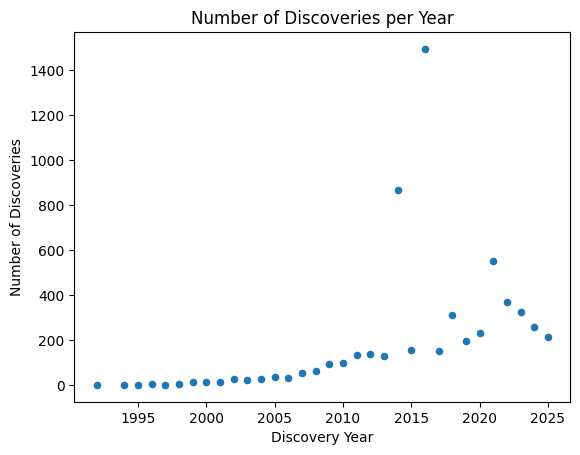

In [7]:
#Making a scatter plot for "Number of Discoveries per Year"
disc_year_counts = df['disc_year'].value_counts()

disc_year_df = disc_year_counts.reset_index()
disc_year_df.columns = ['disc_year', 'count']

disc_year_df.plot.scatter(x='disc_year', y='count', title='Number of Discoveries per Year')
plt.xlabel("Discovery Year")
plt.ylabel("Number of Discoveries")

Text(0.5, 1.0, 'Transit vs. Radial Velocity Discovery Method Usage by Year')

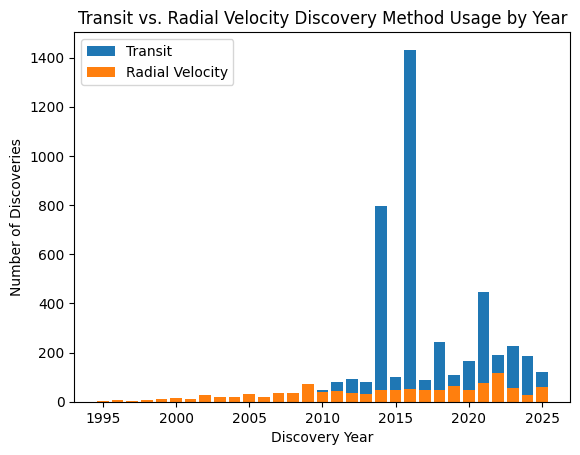

In [8]:
#comparing transit and radial velocity discovery method usage by year
transit_counts = df[df['discoverymethod'] == 'Transit'] ['disc_year'].value_counts()
transit_df = transit_counts.reset_index()
transit_df.columns = ['disc_year', 'count']

radialvelocity_counts = df[df['discoverymethod'] == 'Radial Velocity'] ['disc_year'].value_counts()
radialvelocity_df = radialvelocity_counts.reset_index()
radialvelocity_df.columns = ['disc_year', 'count']

plt.bar(transit_df['disc_year'], transit_df['count'], label='Transit')
plt.bar(radialvelocity_df['disc_year'], radialvelocity_df['count'], label='Radial Velocity')
plt.xlabel("Discovery Year")
plt.ylabel("Number of Discoveries")
plt.legend()
plt.title("Transit vs. Radial Velocity Discovery Method Usage by Year")

In [10]:
# Lets look at the top 5 most popular methods for exoplanet detection
discovery_method_counts = df['discoverymethod'].value_counts()
top_5_methods = discovery_method_counts.head(5)

top_5_methods

,count
discoverymethod,
Transit,4464
Radial Velocity,1158
Microlensing,262
Imaging,87
Transit Timing Variations,39


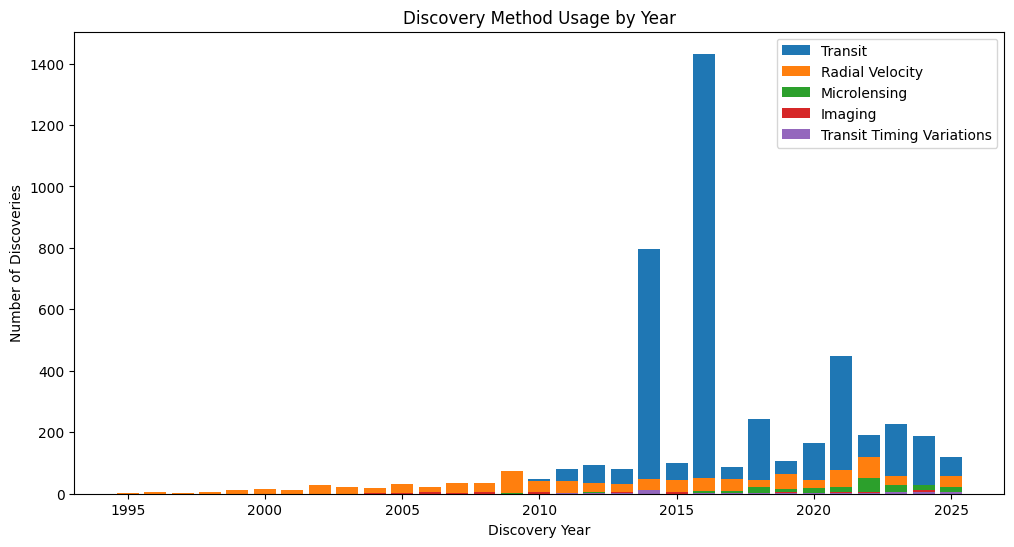

In [13]:
# Comparitive bar plot to graph the number of exoplanets discovered each year by each method

microlensing_counts = df[df['discoverymethod'] == 'Microlensing'] ['disc_year'].value_counts()
microlensing_df = microlensing_counts.reset_index()
microlensing_df.columns = ['disc_year', 'count']

imaging_counts = df[df['discoverymethod'] == 'Imaging'] ['disc_year'].value_counts()
imaging_df = imaging_counts.reset_index()
imaging_df.columns = ['disc_year', 'count']

timing_counts = df[df['discoverymethod'] == 'Transit Timing Variations'] ['disc_year'].value_counts()
timing_df = timing_counts.reset_index()
timing_df.columns = ['disc_year', 'count']


plt.figure(figsize=(12, 6))
plt.bar(transit_df['disc_year'], transit_df['count'], label='Transit')
plt.bar(radialvelocity_df['disc_year'], radialvelocity_df['count'], label='Radial Velocity')
plt.bar(microlensing_df['disc_year'], microlensing_df['count'], label='Microlensing')
plt.bar(imaging_df['disc_year'], imaging_df['count'], label='Imaging')
plt.bar(timing_df['disc_year'], timing_df['count'], label='Transit Timing Variations')
plt.title("Discovery Method Usage by Year")
plt.xlabel("Discovery Year")
plt.ylabel("Number of Discoveries")
plt.legend()
plt.show()

<Figure size 1400x700 with 0 Axes>

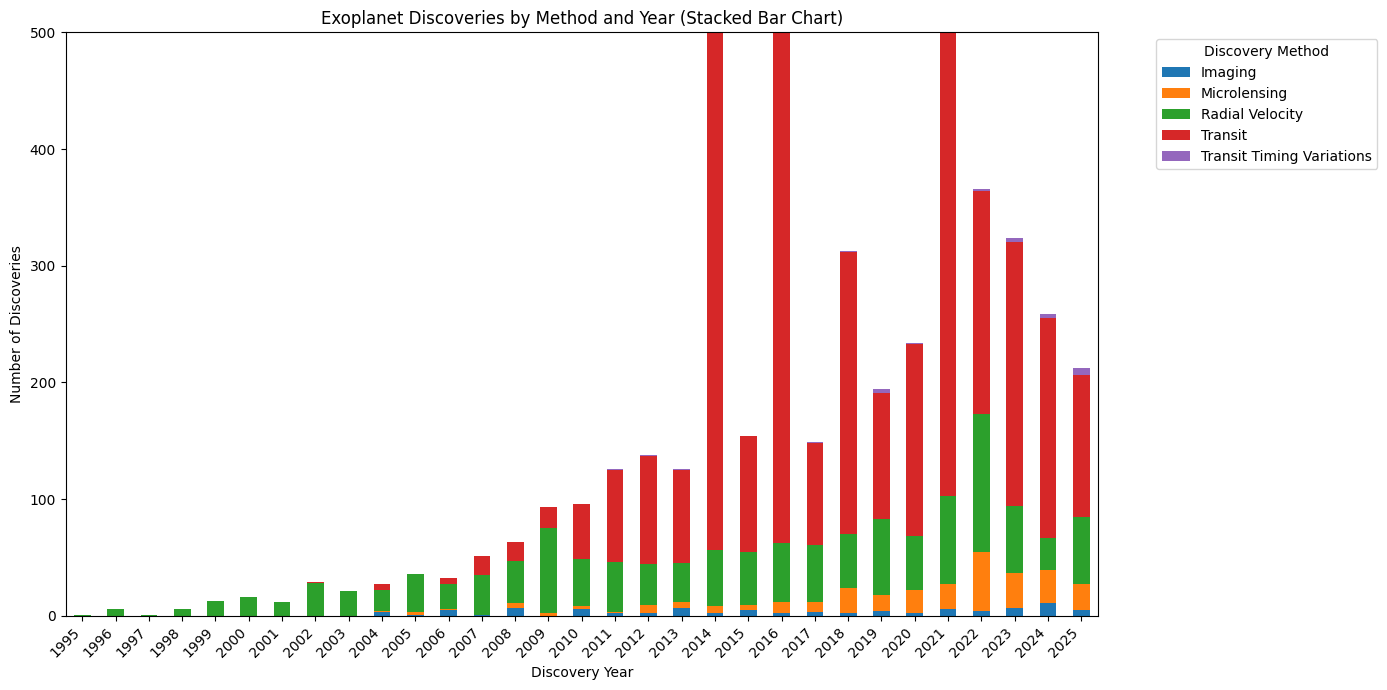

In [16]:
# Combine all discovery method dataframes
combined_df = pd.concat([
    transit_df.assign(discoverymethod='Transit'),
    radialvelocity_df.assign(discoverymethod='Radial Velocity'),
    microlensing_df.assign(discoverymethod='Microlensing'),
    imaging_df.assign(discoverymethod='Imaging'),
    timing_df.assign(discoverymethod='Transit Timing Variations')
])

# Pivot the combined dataframe to prepare for stacked bar plot
pivoted_df = combined_df.pivot_table(index='disc_year', columns='discoverymethod', values='count').fillna(0)

# Sort by discovery year for better visualization
pivoted_df = pivoted_df.sort_index()

# Plotting the stacked bar chart
plt.figure(figsize=(14, 7))
pivoted_df.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Exoplanet Discoveries by Method and Year (Stacked Bar Chart)')
plt.xlabel('Discovery Year')
plt.ylabel('Number of Discoveries')
plt.legend(title='Discovery Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 500) # Set the y-axis limit
plt.tight_layout()
plt.show()